In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

https://facebook.github.io/prophet/docs/quick_start.html

In [2]:
rides = pd.read_csv("rides_weather_hoildays_all_ops.csv")
rides.head()

,Unnamed: 0,date,year,month,day,month_year,dow,year.1,weekend_flag,yesterday,...,Labor Day,Columbus Day,Veterans Day,Thanksgiving Day,Christmas Day,Christmas Eve,New Years Eve,PRCP,TMAX,TMIN
0,0,2014-01-21,2014,1,21,12014,2,2014,False,2014-01-20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,49.0
1,1,2014-01-22,2014,1,22,12014,3,2014,False,2014-01-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,48.0
2,2,2014-01-23,2014,1,23,12014,4,2014,False,2014-01-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,48.0
3,3,2014-01-24,2014,1,24,12014,5,2014,False,2014-01-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,49.0
4,4,2014-01-25,2014,1,25,12014,6,2014,True,2014-01-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,50.0


In [9]:
# the historic df will be for years 2014 - 2017. The aim will be to predict 2018
df = rides[rides.year!= 2018][['date', 'swipes']]
df.columns = ['ds', 'y']
df.head(10)

,ds,y
0,2014-01-21,610287
1,2014-01-22,750258
2,2014-01-23,744432
3,2014-01-24,731204
4,2014-01-25,493683
5,2014-01-26,314091
6,2014-01-27,553294
7,2014-01-28,741857
8,2014-01-29,754586
9,2014-01-30,737107


In [12]:
df_2018 = rides[rides.year == 2018][['date', 'swipes']]
df_2018.columns = ['ds', 'y']

In [11]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1801,2018-12-27
1802,2018-12-28
1803,2018-12-29
1804,2018-12-30
1805,2018-12-31


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1801,2018-12-27,594302.643906,507444.632330,684711.962331
1802,2018-12-28,554178.178959,467171.305749,648348.901399
1803,2018-12-29,269510.591179,186472.661085,360268.561467
1804,2018-12-30,101505.616166,16032.104134,192401.310442
1805,2018-12-31,367756.160039,281207.494865,462331.061764


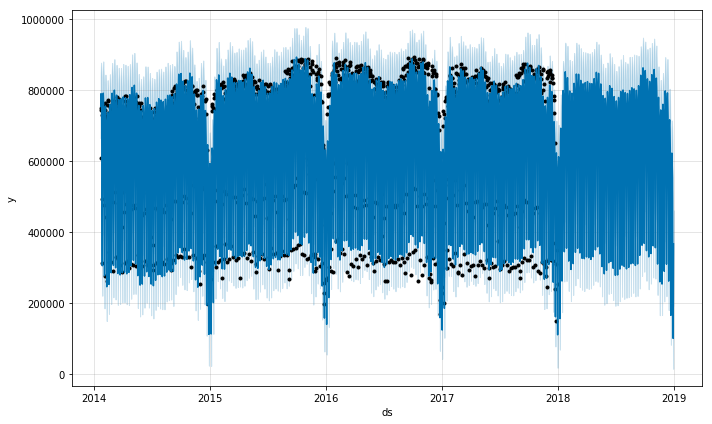

In [17]:
fig1 = m.plot(forecast)

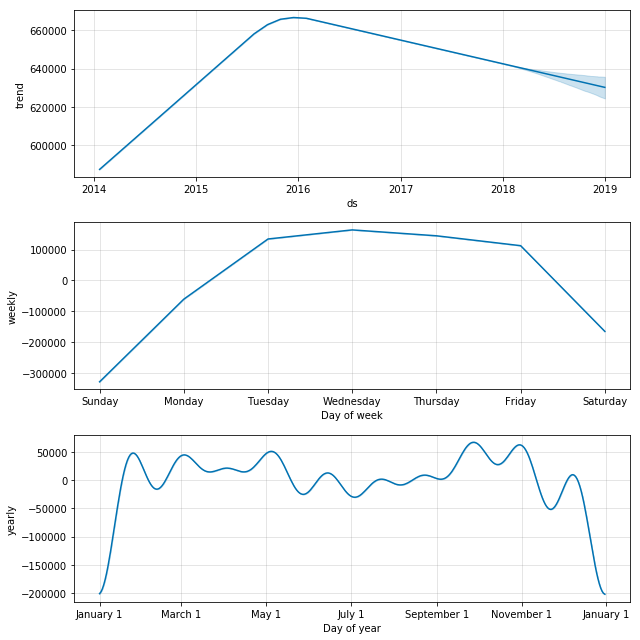

In [18]:
fig2 = m.plot_components(forecast)

In [23]:
df.tail()

,ds,y
1436,2017-12-27,460374
1437,2017-12-28,501348
1438,2017-12-29,501799
1439,2017-12-30,349519
1440,2017-12-31,254176


In [25]:
# 'yhat', 'yhat_lower', 'yhat_upper']]
df_2018['y_hat'] = forecast['yhat']
df_2018['yhat_lower'] = forecast['yhat_lower']
df_2018['yhat_upper'] = forecast['yhat_upper']

abs_errors = abs(df_2018['y_hat'] - df_2018['y'])
sq_errors = (df_2018['y_hat'] - df_2018['y'])**2
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(abs_errors), 4))
print('RMSE :', round(np.sqrt(np.mean(sq_errors)), 4))

Mean Absolute Error: 76360.8192
RMSE : 96640.0203


In [26]:
abs_errors_percent = abs((df_2018['y_hat'] - df_2018['y'])/df_2018['y'])
print("This model's predictions is on average about ", round(np.mean(abs_errors_percent), 4), "off of the actual ridership for that day")


This model's predictions is on average about  0.1292 off of the actual ridership for that day


Text(0.5, 1.0, '2018 True and Predicted Clipper Swipes')

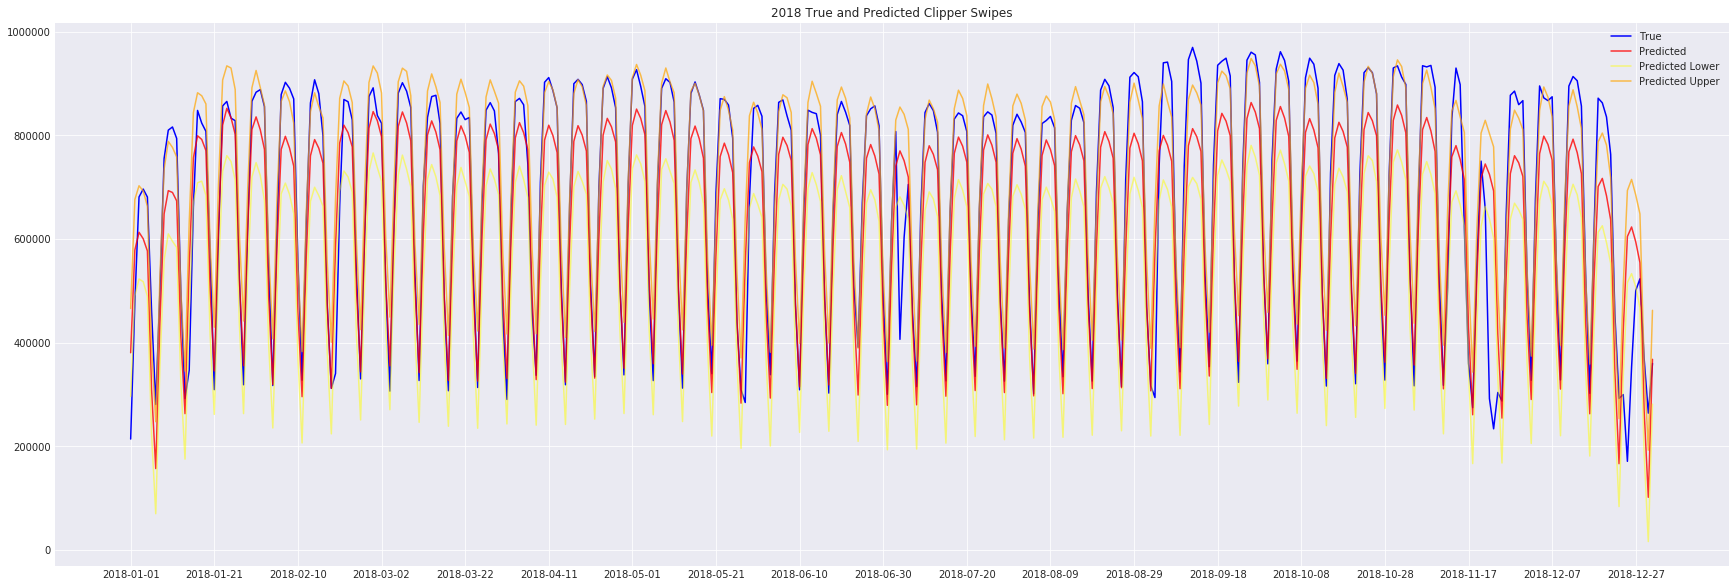

In [49]:
from matplotlib.pyplot import scatter, title
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(30, 10))

plt.plot(df_2018['ds'], df_2018['y'], marker='', color='blue',label='True')
plt.plot(df_2018['ds'], df_2018['y_hat'], marker='', color='red',label='Predicted', alpha=0.8)
plt.plot(df_2018['ds'], df_2018['yhat_lower'], marker='', color='yellow',label='Predicted Lower', alpha=0.5)
plt.plot(df_2018['ds'], df_2018['yhat_upper'], marker='', color='orange',label='Predicted Upper', alpha=0.7)

plt.legend()


ax.set_xticks(ax.get_xticks()[::20])
title("2018 True and Predicted Clipper Swipes")